In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the original dataset
data = pd.read_excel('data.xlsx').drop(index=0)

# Convert Excel file to CSV
data.to_csv('data.csv', index=False)

In [3]:
# Display the first few rows of the raw data
display(data.head())

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
1,2019-01-01 00:15:00,0,0,0,0.5,1037.9,83.9,0
2,2019-01-01 00:30:00,0,0,0,0.5,1037.6,84.9,0
3,2019-01-01 00:45:00,0,0,0,0.5,1037.5,85.3,0
4,2019-01-01 01:00:00,0,0,0,0.3,1037.5,85.4,0
5,2019-01-01 01:15:00,0,0,0,0.4,1037.5,85.7,0


In [4]:
# Create a copy of the CSV dataset
data = data.copy()

In [5]:
# Check the datatype of each variable
data.dtypes


Time(year-month-day h:m:s)             datetime64[ns]
Total solar irradiance (W/m2)                  object
Direct normal irradiance (W/m2)                object
Global horizontal irradiance (W/m2)            object
Air temperature  (°C)                          object
Atmosphere (hpa)                               object
Relative humidity (%)                          object
Power (MW)                                     object
dtype: object

In [6]:
# Check for additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70175 entries, 1 to 70175
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Time(year-month-day h:m:s)           70175 non-null  datetime64[ns]
 1   Total solar irradiance (W/m2)        70175 non-null  object        
 2   Direct normal irradiance (W/m2)      70175 non-null  object        
 3   Global horizontal irradiance (W/m2)  70175 non-null  object        
 4   Air temperature  (°C)                70175 non-null  object        
 5   Atmosphere (hpa)                     70175 non-null  object        
 6   Relative humidity (%)                70175 non-null  object        
 7   Power (MW)                           70175 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 4.3+ MB


In [7]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Time(year-month-day h:m:s)             0
Total solar irradiance (W/m2)          0
Direct normal irradiance (W/m2)        0
Global horizontal irradiance (W/m2)    0
Air temperature  (°C)                  0
Atmosphere (hpa)                       0
Relative humidity (%)                  0
Power (MW)                             0
dtype: int64


In [8]:
import pandas as pd
import numpy as np

# This step cleans the dataset from incorrect entries that can cause issues in the exploratory data analysis when creating visualization plots.

# Replace specific incorrect entries with NaN 
invalid_values = ['NA', '--', 0.001, -99]
data.replace(invalid_values, np.nan, inplace=True)

# Perform upward completion (forward fill)
data.fillna(method='ffill', inplace=True)

# Perform downward completion (backward fill) on remaining NaNs 
data.fillna(method='bfill', inplace=True)

# Save the processed data after both fill operations
data.to_csv('data_filled.csv', index=False)



In [9]:
# Load the processed data with filled missing values
data_filled = pd.read_csv('data_filled.csv')

# Display the first five rows
display(data_filled.head())


,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
0,2019-01-01 00:15:00,0.0,0.0,0.0,0.5,1037.9,83.9,0.0
1,2019-01-01 00:30:00,0.0,0.0,0.0,0.5,1037.6,84.9,0.0
2,2019-01-01 00:45:00,0.0,0.0,0.0,0.5,1037.5,85.3,0.0
3,2019-01-01 01:00:00,0.0,0.0,0.0,0.3,1037.5,85.4,0.0
4,2019-01-01 01:15:00,0.0,0.0,0.0,0.4,1037.5,85.7,0.0


In [10]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70175 entries, 0 to 70174
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time(year-month-day h:m:s)           70175 non-null  object 
 1   Total solar irradiance (W/m2)        70175 non-null  float64
 2   Direct normal irradiance (W/m2)      70175 non-null  float64
 3   Global horizontal irradiance (W/m2)  70175 non-null  float64
 4   Air temperature  (°C)                70175 non-null  float64
 5   Atmosphere (hpa)                     70175 non-null  float64
 6   Relative humidity (%)                70175 non-null  float64
 7   Power (MW)                           70175 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [11]:
# Convert the 'Time' column to datetime format
data_filled['Time(year-month-day h:m:s)'] = pd.to_datetime(data_filled['Time(year-month-day h:m:s)'])

# Verify the changes by checking the data types
print(data_filled.dtypes)


Time(year-month-day h:m:s)             datetime64[ns]
Total solar irradiance (W/m2)                 float64
Direct normal irradiance (W/m2)               float64
Global horizontal irradiance (W/m2)           float64
Air temperature  (°C)                         float64
Atmosphere (hpa)                              float64
Relative humidity (%)                         float64
Power (MW)                                    float64
dtype: object


In [12]:
data_filled.shape

(70175, 8)

In [13]:
# Inspect the column names
print("Column names in the dataset:")
for column in data_filled.columns:
    print(f"'{column}'")  

Column names in the dataset:
'Time(year-month-day h:m:s)'
'Total solar irradiance (W/m2)'
'Direct normal irradiance (W/m2)'
'Global horizontal irradiance (W/m2)'
'Air temperature  (°C) '
'Atmosphere (hpa)'
'Relative humidity (%)'
'Power (MW)'


In [14]:
# Print column names with repr() to see invisible characters or extra spaces
print([repr(col) for col in data_filled.columns])

["'Time(year-month-day h:m:s)'", "'Total solar irradiance (W/m2)'", "'Direct normal irradiance (W/m2)'", "'Global horizontal irradiance (W/m2)'", "'Air temperature  (°C) '", "'Atmosphere (hpa)'", "'Relative humidity (%)'", "'Power (MW)'"]


In [15]:
# Clean column names by stripping extra spaces and non-visible characters
data_filled.columns = data_filled.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Print the column names again to verify they are cleaned
print([repr(col) for col in data_filled.columns])


["'Time(year-month-day h:m:s)'", "'Total solar irradiance (W/m2)'", "'Direct normal irradiance (W/m2)'", "'Global horizontal irradiance (W/m2)'", "'Air temperature (°C)'", "'Atmosphere (hpa)'", "'Relative humidity (%)'", "'Power (MW)'"]


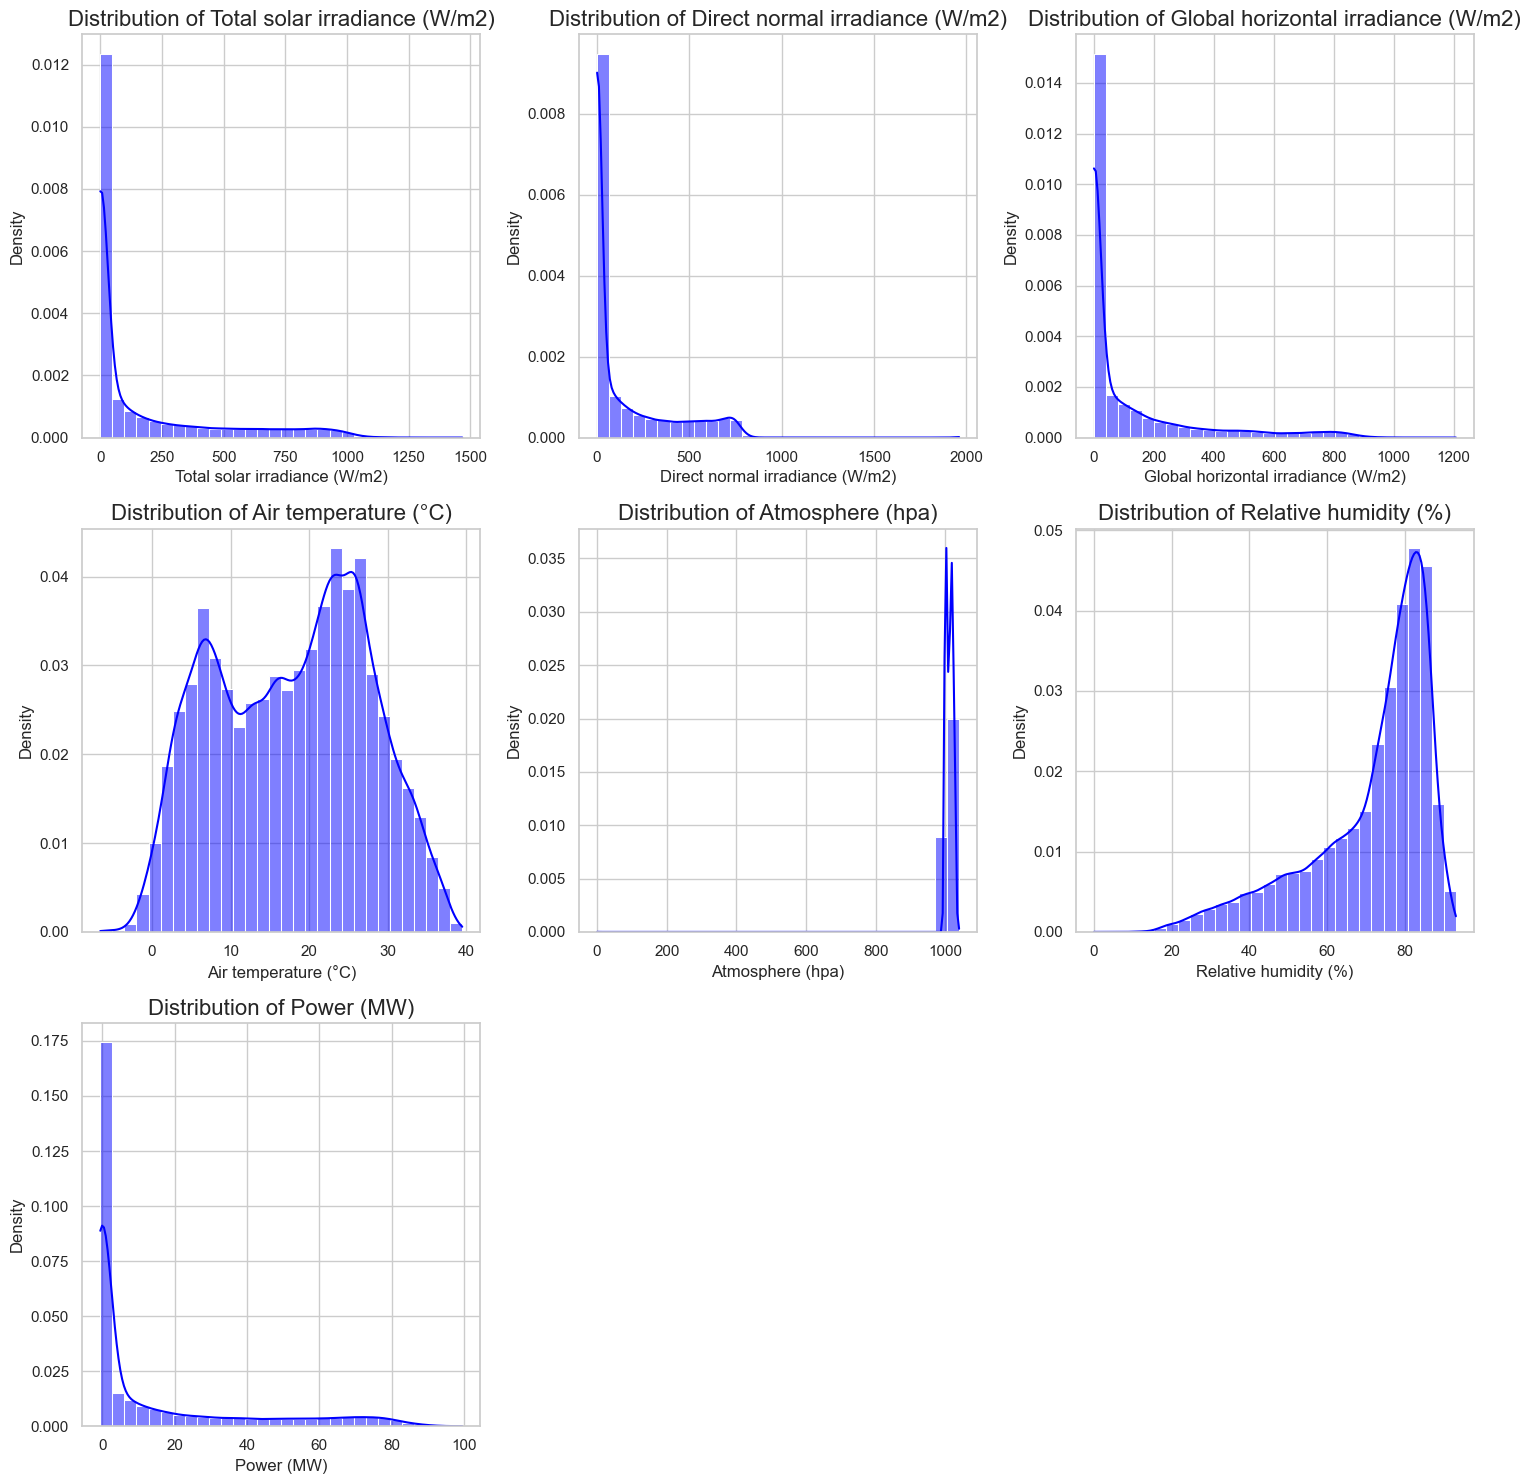

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the style for seaborn
sns.set(style="whitegrid")

# Define the function to create histograms for each feature
def plot_feature_distributions(data):
    # Clean column names by stripping any leading or trailing spaces
    data_filled.columns = data_filled.columns.str.strip()

    features = ['Total solar irradiance (W/m2)',
                'Direct normal irradiance (W/m2)',
                'Global horizontal irradiance (W/m2)',
                'Air temperature (°C)',  
                'Atmosphere (hpa)',       
                'Relative humidity (%)',
                'Power (MW)']

    # Determine the number of rows and columns for the grid
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols 

    # Create subplots for each feature
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        # Ensure that the feature name is safe to use in filenames
        safe_feature_name = feature.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
        
        # Histogram
        sns.histplot(data_filled[feature].dropna(), bins=30, kde=True, ax=axes[i], color='blue', stat="density")   
        axes[i].set_title(f'Distribution of {feature}', fontsize=16)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)
        
    # Hide any unused subplots (if the number of features is less than the number of axes)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Show the final figure with all subplots
    plt.tight_layout()   # Adjust layout
    plt.show()

# Plot distributions
plot_feature_distributions(data_filled)


Column names in the DataFrame:
Index(['Time(year-month-day h:m:s)', 'Total solar irradiance (W/m2)',
       'Direct normal irradiance (W/m2)',
       'Global horizontal irradiance (W/m2)', 'Air temperature (°C)',
       'Atmosphere (hpa)', 'Relative humidity (%)', 'Power (MW)'],
      dtype='object')


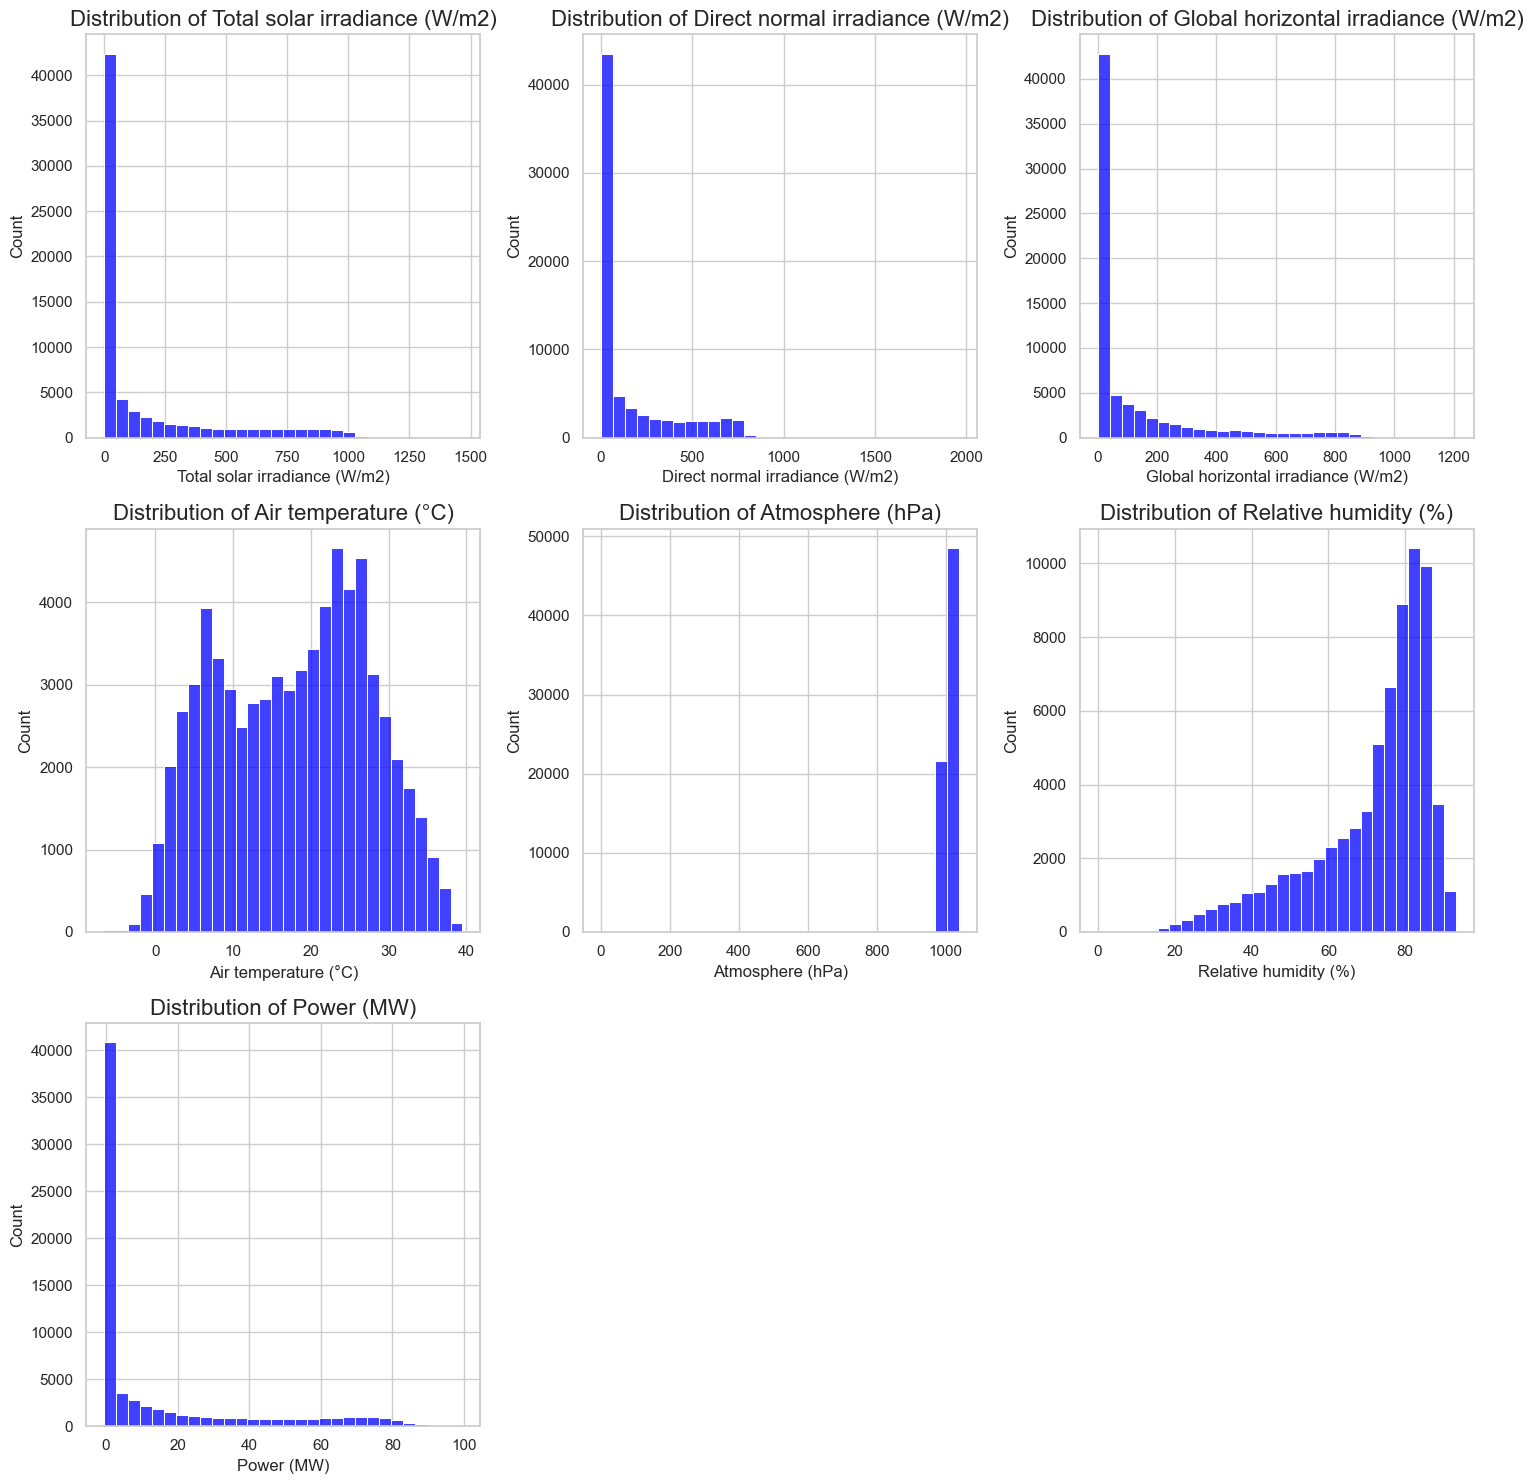

In [17]:
# Define the function to create histograms for each feature
def plot_feature_distributions(data):
    # List of feature labels for the plots
    feature_labels = [
        'Total solar irradiance (W/m2)',
        'Direct normal irradiance (W/m2)',
        'Global horizontal irradiance (W/m2)',
        'Air temperature (°C)', 
        'Atmosphere (hPa)', 
        'Relative humidity (%)',
        'Power (MW)']
    
    # Corresponding column names in the data (to match the plot labels)
    features = [
        'Total solar irradiance (W/m2)',
        'Direct normal irradiance (W/m2)',  
        'Global horizontal irradiance (W/m2)',  
        'Air temperature (°C)', 
        'Atmosphere (hpa)', 
        'Relative humidity (%)',
        'Power (MW)']

    # Clean the column names by stripping any leading/trailing spaces
    data_filled.columns = data_filled.columns.str.strip()

    # Print the column names to verify
    print("Column names in the DataFrame:")
    print(data.columns)

    # Determine the number of rows and columns for the grid
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols 

    # Create subplots for each feature
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, (feature, label) in enumerate(zip(features, feature_labels)):
        if feature in data_filled.columns:
            # Ensure the column is numeric
            data[feature] = pd.to_numeric(data[feature], errors='coerce')  

            # Drop NaN values from the feature column and plot the histogram
            valid_data = data_filled[feature].dropna()
            if not valid_data.empty:
                sns.histplot(valid_data, bins=30, kde=False, ax=axes[i], color='blue')
                axes[i].set_title(f'Distribution of {label}', fontsize=16)
                axes[i].set_xlabel(label, fontsize=12)
                axes[i].set_ylabel('Count', fontsize=12)

                # Save the individual plot as an image
                fig_single, ax_single = plt.subplots(figsize=(8, 6))
                sns.histplot(valid_data, bins=30, kde=False, ax=ax_single, color='blue')
                ax_single.set_title(f'Distribution of {label}', fontsize=16)
                ax_single.set_xlabel(label, fontsize=12)
                ax_single.set_ylabel('Count', fontsize=12)
                plt.tight_layout()
                fig_single.savefig(f"{label.replace(' ', '_').replace('/', '_')}_distribution.png", dpi=300)
                plt.close(fig_single)  # Close the single figure to avoid overlap
            else:
                axes[i].set_visible(False)  # Hide the plot if no valid data
                axes[i].set_title(f"No Data for {label}")
        else:
            axes[i].set_visible(False)  # Hide the subplot if the column is not found
            print(f"Warning: Column '{feature}' not found in data.")

    # Hide any unused subplots (if the number of features is less than the number of axes)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plot the distributions with histograms 
plot_feature_distributions(data_filled)

In [18]:

def sanitize_filename(column_name):
    """Replace invalid characters in the column name to make it a valid filename."""
    invalid_chars = ['(', ')', '/', '\\', ':', '*', '?', '"', '<', '>', '|']
    for char in invalid_chars:
        column_name = column_name.replace(char, '_') 
    return column_name

def plot_and_save_series(data, save_dir="time_series_plots", title_prefix=None):
    """
    Plot all features in the dataset against time and save the plots as images.
    
    Parameters:
    - data: DataFrame containing the dataset.
    - save_dir: Directory to save the plots.
    - title_prefix: Prefix for the title of each plot.
    """
    # Ensure the save directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Ensure the time column is in datetime format
    data['Time(year-month-day h:m:s)'] = pd.to_datetime(data['Time(year-month-day h:m:s)'])
    
    # Loop through all the columns except the time column
    for column in data.columns:
        if column != 'Time(year-month-day h:m:s)':
            # Sanitize the column name to create a valid filename
            sanitized_column_name = sanitize_filename(column)
            
            # Create a plot for each feature
            plt.figure(figsize=(10, 6))  # Set the size to match normalization plot size
            plt.plot(data['Time(year-month-day h:m:s)'], data[column], color='cornflowerblue')
            
            # Set the title with just the column name and " Time Series"
            plt.title(f"{column} Time Series", fontsize=14)
            plt.xlabel("Time", fontsize=12)
            plt.ylabel(column, fontsize=12)
            plt.grid(True)

            # Save the plot to the specified directory with 300 DPI
            plot_filename = os.path.join(save_dir, f"{sanitized_column_name}_plot.png")
            plt.savefig(plot_filename, dpi=300)
            plt.close()  # Close the figure to free memory
            print(f"Plot saved for {column} at {plot_filename}")
    
    print(f"All plots have been saved in the directory: {save_dir}")

# Call the function to plot each time series from the 'data_filled' dataset
plot_and_save_series(data_filled)

Plot saved for Total solar irradiance (W/m2) at time_series_plots\Total solar irradiance _W_m2__plot.png
Plot saved for Direct normal irradiance (W/m2) at time_series_plots\Direct normal irradiance _W_m2__plot.png
Plot saved for Global horizontal irradiance (W/m2) at time_series_plots\Global horizontal irradiance _W_m2__plot.png
Plot saved for Air temperature (°C) at time_series_plots\Air temperature _°C__plot.png
Plot saved for Atmosphere (hpa) at time_series_plots\Atmosphere _hpa__plot.png
Plot saved for Relative humidity (%) at time_series_plots\Relative humidity _%__plot.png
Plot saved for Power (MW) at time_series_plots\Power _MW__plot.png
All plots have been saved in the directory: time_series_plots


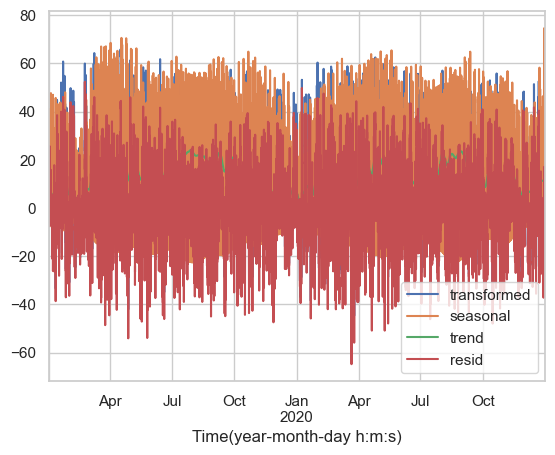

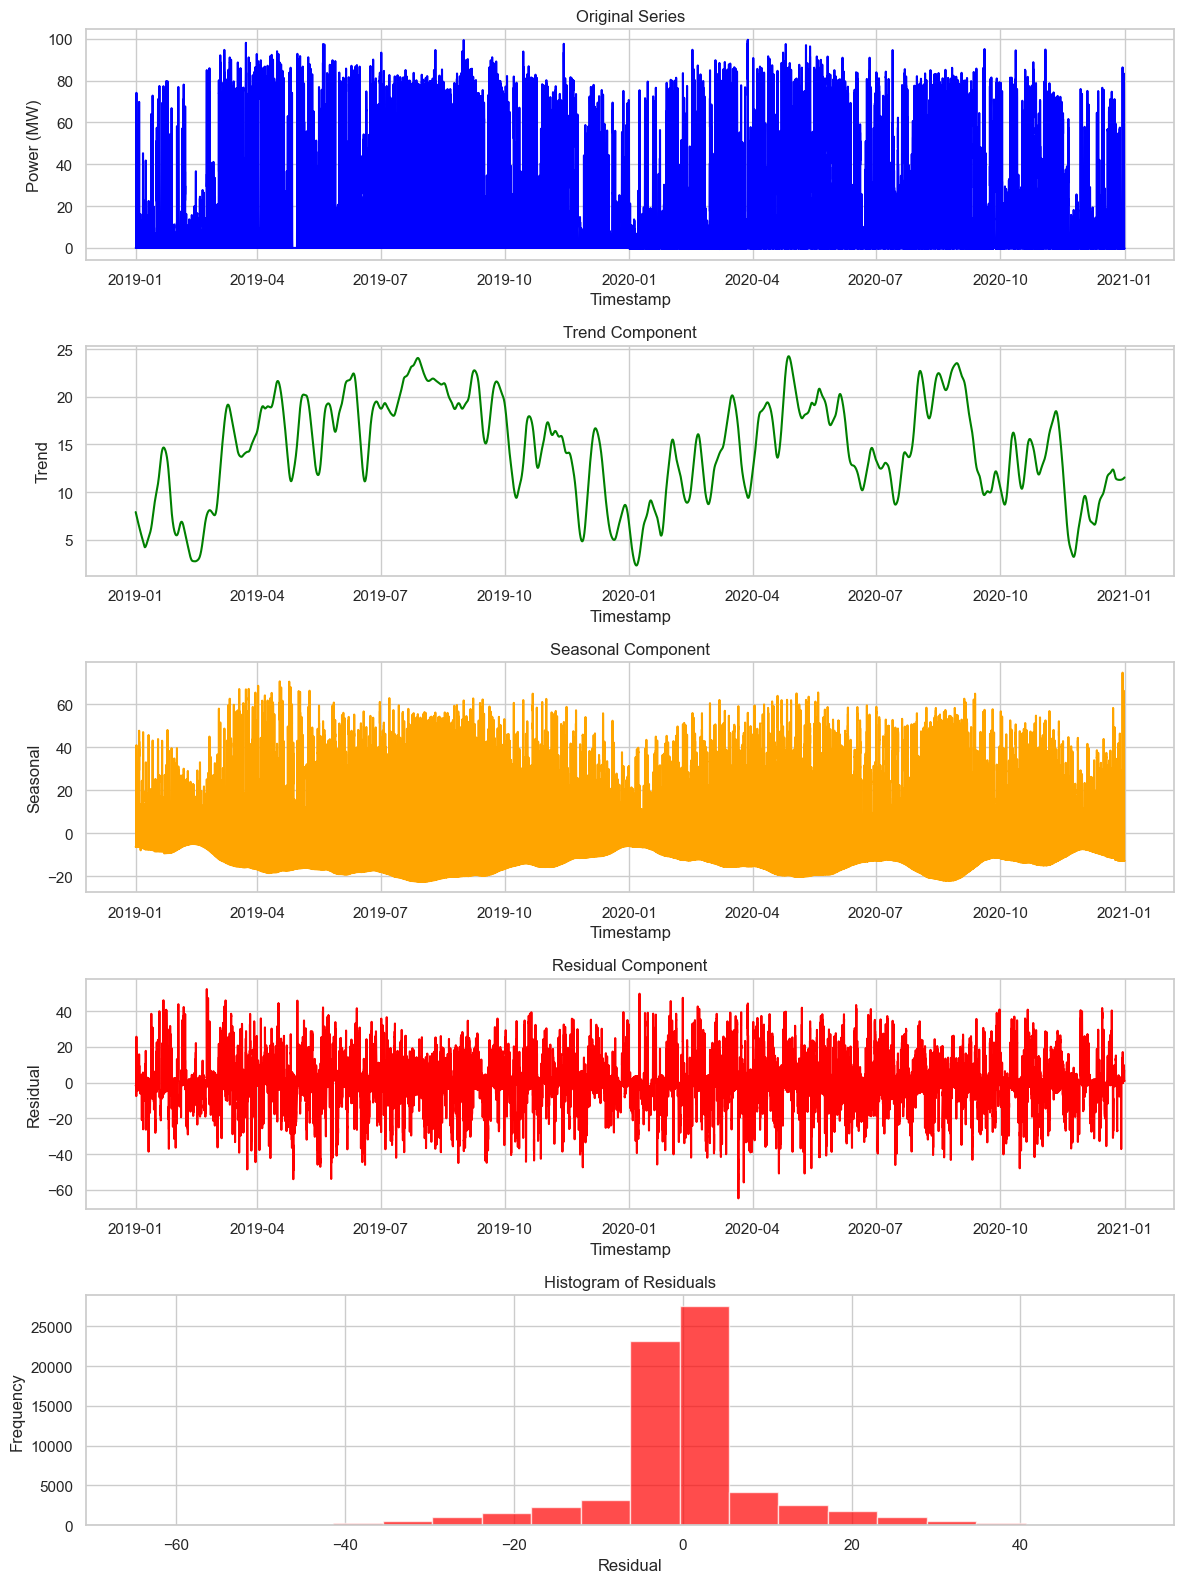

In [19]:
from sktime.transformations.series.detrend import STLTransformer
import matplotlib.pyplot as plt

# Decompose the target variable to check for trend, seasonality, and residuals.

# Set 'time' as the index
power_series = data_filled.set_index('Time(year-month-day h:m:s)')['Power (MW)']

# Apply STLTransformer to decompose the series (672 lags for weekly seasonality)
transformer = STLTransformer(sp=672, return_components=True)  # sp=672 for weekly seasonality (as we have measurements at 15 min intervals)
result = transformer.fit_transform(power_series)

# Plot the decomposed components (trend, seasonal, residuals)
result.plot()

# Extract components from the result
trend = result['trend']
seasonal = result['seasonal']
resid = result['resid']

# Plot each component separately
fig, axes = plt.subplots(5, 1, figsize=(12, 16))

# Plot the original series
axes[0].plot(power_series.index, power_series, color='blue')
axes[0].set_title('Original Series')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Power (MW)')

# Plot the trend component
axes[1].plot(power_series.index, trend, color='green')
axes[1].set_title('Trend Component')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Trend')

# Plot the seasonal component
axes[2].plot(power_series.index, seasonal, color='orange')
axes[2].set_title('Seasonal Component')
axes[2].set_xlabel('Timestamp')
axes[2].set_ylabel('Seasonal')

# Plot the residual component
axes[3].plot(power_series.index, resid, color='red')
axes[3].set_title('Residual Component')
axes[3].set_xlabel('Timestamp')
axes[3].set_ylabel('Residual')

# Add histogram of residuals
axes[4].hist(resid, bins=20, color='red', alpha=0.7)
axes[4].set_title('Histogram of Residuals')
axes[4].set_xlabel('Residual')
axes[4].set_ylabel('Frequency')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('decomposed_series_plots.png', dpi=300)
plt.show()


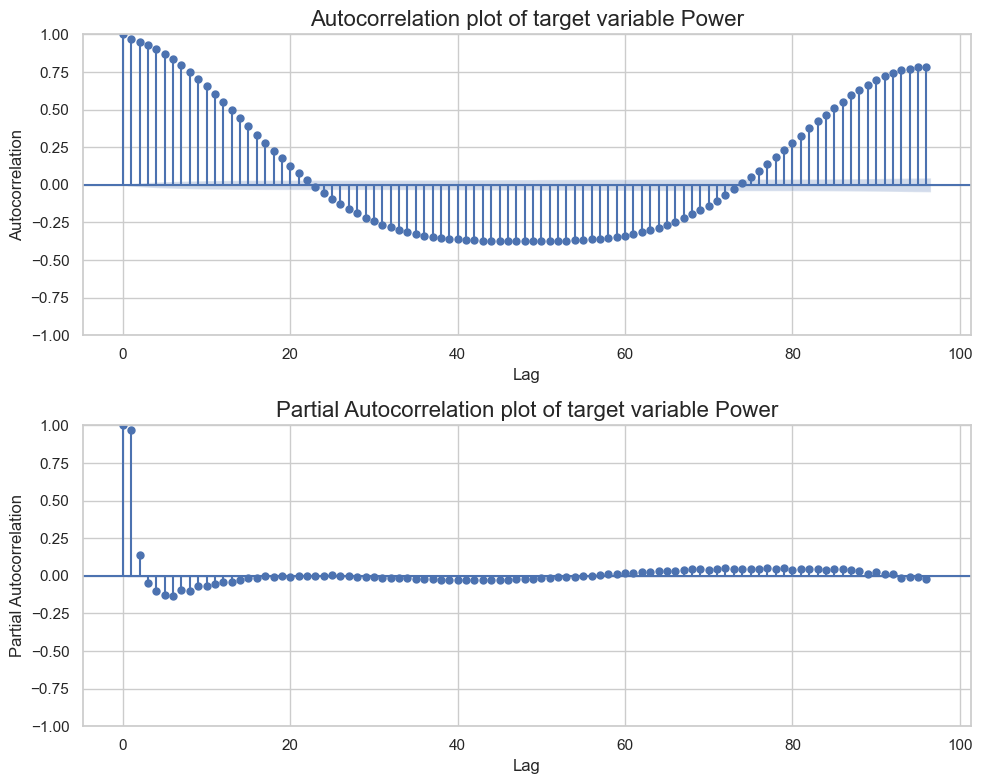

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation and partial autocorrelation plots for the target variable 'power'

# Create the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Autocorrelation plot (ACF)
plot_acf(data_filled['Power (MW)'], lags=96, ax=ax[0])                            # Check 96 lags (i.e. 1 day, as we have measurements recorded every 15 minutes)
ax[0].set_title('Autocorrelation plot of target variable Power', fontsize=16)
ax[0].set_xlabel('Lag', fontsize=12)
ax[0].set_ylabel('Autocorrelation', fontsize=12)

# Partial Autocorrelation plot (PACF) with method='ywm' to avoid warnings
plot_pacf(data_filled['Power (MW)'], lags=96, ax=ax[1], method='ywm')
ax[1].set_title('Partial Autocorrelation plot of target variable Power', fontsize=16)
ax[1].set_xlabel('Lag', fontsize=12)
ax[1].set_ylabel('Partial Autocorrelation', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
# Save the plot with 300 DPI
fig.savefig('correlation_plots.png', dpi=300)
plt.show()


Preprocessing steps

In [21]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70175 entries, 0 to 70174
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Time(year-month-day h:m:s)           70175 non-null  datetime64[ns]
 1   Total solar irradiance (W/m2)        70175 non-null  float64       
 2   Direct normal irradiance (W/m2)      70175 non-null  float64       
 3   Global horizontal irradiance (W/m2)  70175 non-null  float64       
 4   Air temperature (°C)                 70175 non-null  float64       
 5   Atmosphere (hpa)                     70175 non-null  float64       
 6   Relative humidity (%)                70175 non-null  float64       
 7   Power (MW)                           70175 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 4.3 MB


In [22]:
data_filled.describe()

,Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,164.310752,147.876352,115.021318,17.776502,1011.976742,71.613305,14.489811
std,273.381403,234.859302,203.020021,9.628228,10.649241,15.607147,23.859150
min,0.000000,0.000000,0.000000,-6.600000,0.000000,0.000000,-0.540000
25%,0.000000,0.000000,0.000000,9.200000,1003.000000,64.200000,-0.230000
50%,0.000000,1.000000,0.000000,18.600000,1012.200000,77.200000,0.000000
75%,212.000000,220.000000,138.000000,25.500000,1020.000000,82.900000,19.590000
max,1467.000000,1962.000000,1208.000000,39.500000,1039.400000,93.200000,99.550000


In [23]:
# Clean column names
data_filled.columns = data_filled.columns.str.replace(r'\(.*\)', '', regex=True).str.strip()
data_filled.columns = data_filled.columns.str.replace(' ', '_')  # Replace empty spaces with underscores
data_filled.columns = data_filled.columns.str.lower()  # Convert uppercase letters to lowercase

# Display the cleaned column names
display(data_filled.columns)

Index(['time', 'total_solar_irradiance', 'direct_normal_irradiance',
       'global_horizontal_irradiance', 'air_temperature', 'atmosphere',
       'relative_humidity', 'power'],
      dtype='object')

In [24]:
# Check for zero values in each column and count them
zero_counts = (data_filled[['total_solar_irradiance',
                       'direct_normal_irradiance',
                       'global_horizontal_irradiance',
                       'air_temperature',
                       'atmosphere',
                       'relative_humidity',
                       'power']] == 0.00).astype(float).sum()

# Display results
print("Count of zero values in each measurement column:")
print(zero_counts)


Count of zero values in each measurement column:
total_solar_irradiance          35623.0
direct_normal_irradiance        34906.0
global_horizontal_irradiance    35470.0
air_temperature                   111.0
atmosphere                          1.0
relative_humidity                   1.0
power                           18620.0
dtype: float64


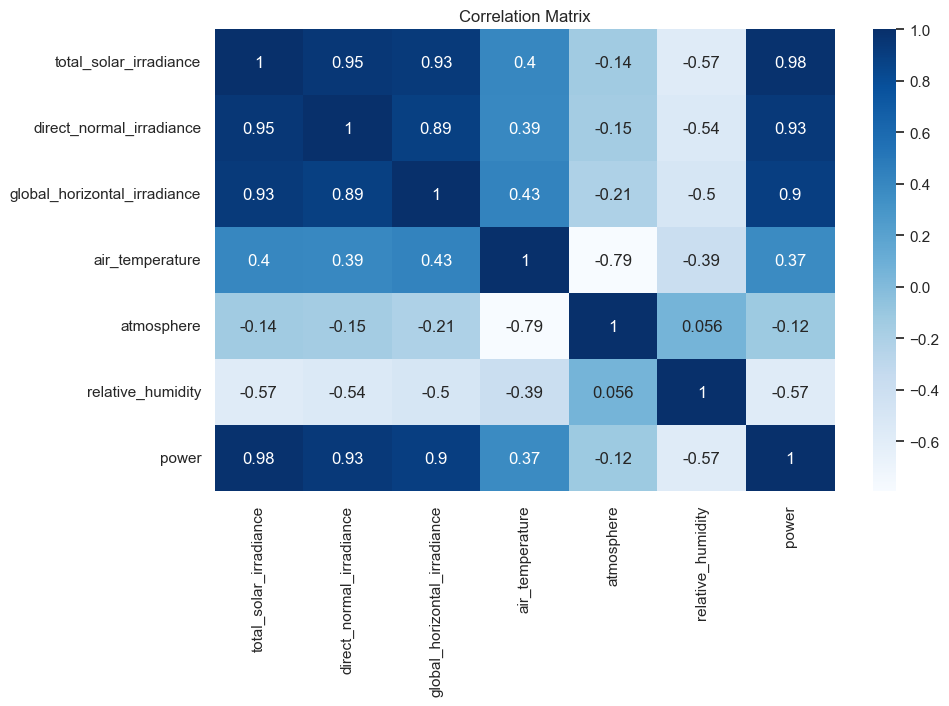

In [25]:
# Compute the correlation matrix
correlation_matrix = data_filled.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')  
plt.title('Correlation Matrix')

# Save the figure as an image file
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


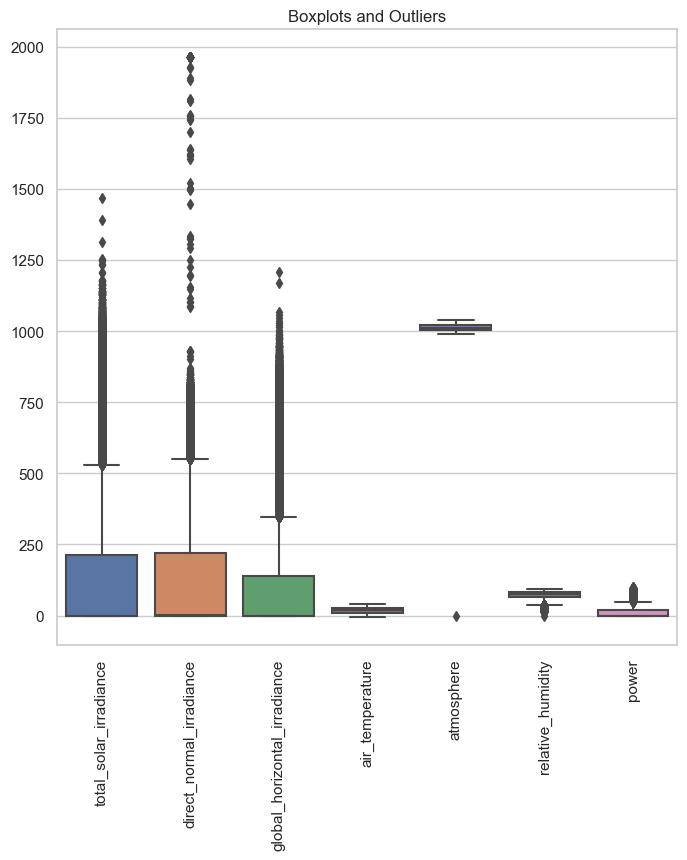

In [26]:
# Check for outliers using the boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(data=data_filled[['total_solar_irradiance',
                         'direct_normal_irradiance',
                         'global_horizontal_irradiance',
                         'air_temperature',
                         'atmosphere',
                         'relative_humidity',
                         'power']])
plt.xticks(rotation=90)
plt.title('Boxplots and Outliers')

# Save the boxplot as an image file
plt.savefig("boxplots_and_outliers.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


In [27]:
import pandas as pd

# Define the columns that you want to check for outliers
columns_to_check = ['total_solar_irradiance', 'direct_normal_irradiance', 
                    'global_horizontal_irradiance', 'air_temperature', 
                    'atmosphere', 'relative_humidity', 'power']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column and identify outliers
outliers_mask = {}

for column in columns_to_check:
    Q1 = data_filled[column].quantile(0.25)
    Q3 = data_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds using 1.5 * IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for each column (values below lower bound or above upper bound)
    outliers = (data_filled[column] < lower_bound) | (data_filled[column] > upper_bound)
    outliers_mask[column] = outliers

    # Count how many outliers in each column
    print(f"Outliers in '{column}' before removal: {outliers.sum()}")

# Apply outlier removal (remove rows that have outliers in any of the columns)
data_cleaned = data_filled[~(outliers_mask['total_solar_irradiance'] |
                            outliers_mask['direct_normal_irradiance'] |
                            outliers_mask['global_horizontal_irradiance'] |
                            outliers_mask['air_temperature'] |
                            outliers_mask['atmosphere'] |
                            outliers_mask['relative_humidity'] |
                            outliers_mask['power'])]

# Show the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {data_filled.shape}")
print(f"Dataset shape after removing outliers: {data_cleaned.shape}")

# Check how many values remain in each column after removing outliers
print("Remaining values in each column after removing outliers:")
print(data_cleaned[columns_to_check].count())

Outliers in 'total_solar_irradiance' before removal: 9395
Outliers in 'direct_normal_irradiance' before removal: 7514
Outliers in 'global_horizontal_irradiance' before removal: 8656
Outliers in 'air_temperature' before removal: 0
Outliers in 'atmosphere' before removal: 1
Outliers in 'relative_humidity' before removal: 3047
Outliers in 'power' before removal: 9282
Original dataset shape: (70175, 8)
Dataset shape after removing outliers: (57468, 8)
Remaining values in each column after removing outliers:
total_solar_irradiance          57468
direct_normal_irradiance        57468
global_horizontal_irradiance    57468
air_temperature                 57468
atmosphere                      57468
relative_humidity               57468
power                           57468
dtype: int64


In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57468 entries, 0 to 70174
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   time                          57468 non-null  datetime64[ns]
 1   total_solar_irradiance        57468 non-null  float64       
 2   direct_normal_irradiance      57468 non-null  float64       
 3   global_horizontal_irradiance  57468 non-null  float64       
 4   air_temperature               57468 non-null  float64       
 5   atmosphere                    57468 non-null  float64       
 6   relative_humidity             57468 non-null  float64       
 7   power                         57468 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.9 MB


In [29]:
data_cleaned.head()

,time,total_solar_irradiance,direct_normal_irradiance,global_horizontal_irradiance,air_temperature,atmosphere,relative_humidity,power
0,2019-01-01 00:15:00,0.0,0.0,0.0,0.5,1037.9,83.9,0.0
1,2019-01-01 00:30:00,0.0,0.0,0.0,0.5,1037.6,84.9,0.0
2,2019-01-01 00:45:00,0.0,0.0,0.0,0.5,1037.5,85.3,0.0
3,2019-01-01 01:00:00,0.0,0.0,0.0,0.3,1037.5,85.4,0.0
4,2019-01-01 01:15:00,0.0,0.0,0.0,0.4,1037.5,85.7,0.0


In [29]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a copy of data_cleaned
data_cleaned = data_cleaned.copy()

# Replace zeros with NaN in numeric columns 
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].replace(0, np.nan)

# Apply linear interpolation to impute NaN values in numeric columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].interpolate(method='linear', limit_direction='both')

# Apply KNN Imputation to handle the remaining 0 values
imputer = KNNImputer(n_neighbors=5)
data_cleaned[numeric_columns] = imputer.fit_transform(data_cleaned[numeric_columns])

# Verify alignment between 'time' and other features
if data_cleaned['time'].nunique() != data_cleaned.shape[0]:
    raise ValueError("Mismatch detected: 'time' column and other features are not aligned!")

# Confirm no missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values count after imputation:")
print(missing_values)

# Display the cleaned DataFrame info
print("Shape of the cleaned DataFrame:", data_cleaned.shape)
print(data_cleaned.info())


Missing values count after imputation:
time                            0
total_solar_irradiance          0
direct_normal_irradiance        0
global_horizontal_irradiance    0
air_temperature                 0
atmosphere                      0
relative_humidity               0
power                           0
dtype: int64
Shape of the cleaned DataFrame: (57468, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57468 entries, 0 to 70174
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   time                          57468 non-null  datetime64[ns]
 1   total_solar_irradiance        57468 non-null  float64       
 2   direct_normal_irradiance      57468 non-null  float64       
 3   global_horizontal_irradiance  57468 non-null  float64       
 4   air_temperature               57468 non-null  float64       
 5   atmosphere                    57468 non-null  float64     

In [30]:
data_cleaned.head()

,time,total_solar_irradiance,direct_normal_irradiance,global_horizontal_irradiance,air_temperature,atmosphere,relative_humidity,power
0,2019-01-01 00:15:00,1.0,240.0,1.0,0.5,1037.9,83.9,0.22
1,2019-01-01 00:30:00,1.0,240.0,1.0,0.5,1037.6,84.9,0.22
2,2019-01-01 00:45:00,1.0,240.0,1.0,0.5,1037.5,85.3,0.22
3,2019-01-01 01:00:00,1.0,240.0,1.0,0.3,1037.5,85.4,0.22
4,2019-01-01 01:15:00,1.0,240.0,1.0,0.4,1037.5,85.7,0.22


In [31]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57468 entries, 0 to 70174
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   time                          57468 non-null  datetime64[ns]
 1   total_solar_irradiance        57468 non-null  float64       
 2   direct_normal_irradiance      57468 non-null  float64       
 3   global_horizontal_irradiance  57468 non-null  float64       
 4   air_temperature               57468 non-null  float64       
 5   atmosphere                    57468 non-null  float64       
 6   relative_humidity             57468 non-null  float64       
 7   power                         57468 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.9 MB


In [32]:

# Set the 'time' column as the index of the DataFrame
data_cleaned.set_index('time', inplace=True)

# Filter the time between 5:00 and 20:00
data_filtered = data_cleaned.between_time('05:00', '20:00')

# Remove any rows with negative values in numerical columns
numerical_columns = data_filtered.select_dtypes(include=['number']).columns
data_filtered = data_filtered[(data_filtered[numerical_columns] >= 0).all(axis=1)]

# Display the dataset after time filtering
display(data_filtered.head())


,total_solar_irradiance,direct_normal_irradiance,global_horizontal_irradiance,air_temperature,atmosphere,relative_humidity,power
time,,,,,,,
2019-01-01 05:00:00,1.0,240.0,1.0,0.5,1036.5,81.2,0.22
2019-01-01 05:15:00,1.0,240.0,1.0,0.6,1036.8,80.5,0.22
2019-01-01 05:30:00,1.0,240.0,1.0,0.7,1036.7,80.3,0.22
2019-01-01 05:45:00,1.0,240.0,1.0,0.7,1036.5,80.1,0.22
2019-01-01 06:00:00,1.0,240.0,1.0,0.7,1036.5,79.3,0.22


In [33]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26404 entries, 2019-01-01 05:00:00 to 2020-12-30 17:15:00
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_solar_irradiance        26404 non-null  float64
 1   direct_normal_irradiance      26404 non-null  float64
 2   global_horizontal_irradiance  26404 non-null  float64
 3   air_temperature               26404 non-null  float64
 4   atmosphere                    26404 non-null  float64
 5   relative_humidity             26404 non-null  float64
 6   power                         26404 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


In [34]:
# Save the dataset
data_filtered.to_csv('filtered_data.csv', index=True)